In [1]:
import numpy as np
import pandas as pd
import pickle

In [2]:
df = pd.read_fwf('./wili dataset/x_train.txt', header=None)
X_train = df[[0]]
df = pd.read_fwf('./wili dataset/x_test.txt', header=None)
X_test = df[[0]] 

In [3]:
target = pd.read_fwf('./wili dataset/y_train.txt',header = None)
y_train = target[[0]]
target = pd.read_fwf('./wili dataset/y_test.txt',header = None)
y_test = target[[0]]

In [4]:
y_train[y_train == 'be-tara'] = 'be-tarask'
y_train[y_train == 'roa-tar'] = 'roa-tara'

In [5]:
languages = ['eng', 'hin', 'mar', 'guj', 'tam', 'tcy', 'tel', 'pan', 'ben', 'mai']

In [6]:
train_index = y_train.index[y_train[0].isin(languages)].tolist()

In [7]:
test_index = y_test.index[y_test[0].isin(languages)].tolist()

In [8]:
X_train_p = X_train.iloc[train_index,:]
X_test_p = X_test.iloc[test_index,:]

In [9]:
y_train_p = y_train.iloc[train_index, :]
y_test_p = y_test.iloc[test_index, :]

### Tokenize Labels

In [10]:
label2int = {}
int2label = {}
counter = 0
for label in languages:
    if label not in label2int:
        label2int[label] = counter
        int2label[counter] = label
    counter += 1

In [11]:
pickle.dump(label2int, open('label2int.pkl', 'wb'))
pickle.dump(int2label, open('int2label.pkl', 'wb'))

### Tokenize target Variables

In [12]:
y_train_int = []
for label in y_train_p[0]:
    y_train_int.append(label2int[label])

In [13]:
y_test_int = []
for label in y_test_p[0]:
    y_test_int.append(label2int[label])

### Data Preprocessing

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
vectorizer = TfidfVectorizer(analyzer='char',min_df=25,lowercase=True, norm='l2')

In [16]:
vectorizer.fit(X_train_p[0])

TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=25,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [17]:
X_train2int = vectorizer.transform(X_train_p[0]).toarray()

In [18]:
X_test2int = vectorizer.transform(X_test_p[0]).toarray()

In [19]:
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

### Scaler

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
sc = StandardScaler()

In [24]:
sc.fit(X_train2int)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
X_train2int_sc = sc.transform(X_train2int)
X_test2int_sc = sc.transform(X_test2int)

In [26]:
pickle.dump(sc, open('scaler.pkl', 'wb'))

### PCA

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=80)

In [23]:
pca.fit(X_train2int)

PCA(copy=True, iterated_power='auto', n_components=80, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
X_train_pca = pca.transform(X_train2int)

In [25]:
X_test_pca = pca.transform(X_test2int)

In [26]:
import matplotlib.pyplot as plt

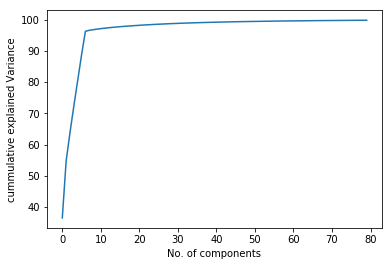

In [27]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel("No. of components")
plt.ylabel("cummulative explained Variance");

In [28]:
pickle.dump(pca, open('pca.pkl', 'wb'))

### One Hot Encoding

In [29]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
y_train_int = np.array(y_train_int).reshape(-1, 1)
y_test_int = np.array(y_test_int).reshape(-1, 1)

In [31]:
enc = OneHotEncoder()

In [32]:
enc.fit(y_train_int)

OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [33]:
y_train_enc = enc.transform(y_train_int)
y_test_enc = enc.transform(y_test_int)

## Design ANN

In [34]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

C:\Users\Jatin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [35]:
clf = Sequential()
clf.add(Dense(output_dim = 60, kernel_initializer = 'uniform', activation='relu', input_dim = 80))
clf.add(Dropout(rate=0.2))
clf.add(Dense(output_dim = 60, kernel_initializer = 'uniform', activation='relu'))
clf.add(Dropout(rate=0.2))
clf.add(Dense(output_dim = 130, kernel_initializer = 'uniform', activation='relu'))
clf.add(Dropout(rate=0.2))
clf.add(Dense(output_dim =10  , kernel_initializer = 'uniform', activation='softmax'))

C:\Users\Jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=80, units=60)`
  
C:\Users\Jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=60)`
  after removing the cwd from sys.path.
C:\Users\Jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=130)`
  
C:\Users\Jatin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="softmax", units=10)`
  


In [36]:
clf.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [37]:
with tf.device('/gpu:0'):
    history = clf.fit(X_train_pca, y_train_enc, batch_size=16, epochs=100, validation_data=(X_test_pca,y_test_enc))

Train on 5000 samples, validate on 5000 samples
Epoch 1/100
5000/5000 [==============================] - 3s 623us/step - loss: 1.1986 - acc: 0.5662 - val_loss: 0.5280 - val_acc: 0.7734
Epoch 2/100
5000/5000 [==============================] - 2s 314us/step - loss: 0.4875 - acc: 0.7844 - val_loss: 0.4191 - val_acc: 0.8506
Epoch 3/100
5000/5000 [==============================] - 2s 313us/step - loss: 0.3672 - acc: 0.8538 - val_loss: 0.2770 - val_acc: 0.9172
Epoch 4/100
5000/5000 [==============================] - 2s 311us/step - loss: 0.2697 - acc: 0.9068 - val_loss: 0.2112 - val_acc: 0.9430
Epoch 5/100
5000/5000 [==============================] - 2s 312us/step - loss: 0.2190 - acc: 0.9280 - val_loss: 0.1912 - val_acc: 0.9494
Epoch 6/100
5000/5000 [==============================] - 2s 313us/step - loss: 0.1927 - acc: 0.9390 - val_loss: 0.1740 - val_acc: 0.9544
Epoch 7/100
5000/5000 [==============================] - 2s 310us/step - loss: 0.1643 - acc: 0.9550 - val_loss: 0.1600 - val_acc: 

5000/5000 [==============================] - 2s 315us/step - loss: 0.0407 - acc: 0.9886 - val_loss: 0.1923 - val_acc: 0.9698
Epoch 61/100
5000/5000 [==============================] - 2s 325us/step - loss: 0.0293 - acc: 0.9924 - val_loss: 0.1977 - val_acc: 0.9688
Epoch 62/100
5000/5000 [==============================] - 2s 311us/step - loss: 0.0379 - acc: 0.9912 - val_loss: 0.1863 - val_acc: 0.9704
Epoch 63/100
5000/5000 [==============================] - 2s 318us/step - loss: 0.0316 - acc: 0.9912 - val_loss: 0.1876 - val_acc: 0.9688
Epoch 64/100
5000/5000 [==============================] - 2s 321us/step - loss: 0.0261 - acc: 0.9924 - val_loss: 0.1988 - val_acc: 0.9690
Epoch 65/100
5000/5000 [==============================] - 2s 318us/step - loss: 0.0321 - acc: 0.9922 - val_loss: 0.1906 - val_acc: 0.9690
Epoch 66/100
5000/5000 [==============================] - 2s 315us/step - loss: 0.0341 - acc: 0.9898 - val_loss: 0.1988 - val_acc: 0.9670
Epoch 67/100
5000/5000 [=======================

In [38]:
from keras.models import model_from_json
model_json = clf.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
clf.save_weights("model.h5")

## Evaluation

In [39]:
y_pred_test_label = clf.predict(X_test_pca)
y_pred_train_label = clf.predict(X_train_pca)

In [40]:
y_pred_test = np.argmax(y_pred_test_label, axis=1)
y_pred_train = np.argmax(y_pred_train_label, axis=1)

In [41]:
y_train_true = y_train_int.astype(np.int)
y_test_true = y_test_int.astype(np.int)

## Graph Plot

### Model Accuracy Graph

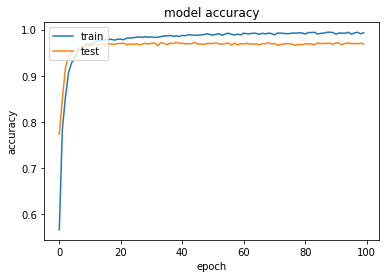

In [42]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Model Loss Graph

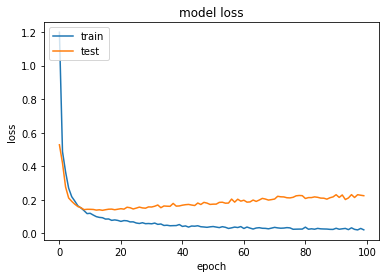

In [43]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Classification Report

In [44]:
from sklearn.metrics import classification_report

#### Train Data report

In [45]:
print(classification_report(y_train_true, y_pred_train))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00       500
          1       0.98      1.00      0.99       500
          2       1.00      1.00      1.00       500
          3       1.00      1.00      1.00       500
          4       1.00      1.00      1.00       500
          5       1.00      1.00      1.00       500
          6       1.00      1.00      1.00       500
          7       1.00      1.00      1.00       500
          8       1.00      1.00      1.00       500
          9       1.00      0.98      0.99       500

avg / total       1.00      1.00      1.00      5000



#### Test Data Report

In [46]:
print(classification_report(y_test_true, y_pred_test))

             precision    recall  f1-score   support

          0       0.88      0.94      0.91       500
          1       0.97      0.96      0.96       500
          2       0.97      0.97      0.97       500
          3       0.95      0.98      0.97       500
          4       1.00      0.99      0.99       500
          5       1.00      1.00      1.00       500
          6       0.97      0.96      0.97       500
          7       1.00      0.99      0.99       500
          8       0.98      0.96      0.97       500
          9       0.97      0.95      0.96       500

avg / total       0.97      0.97      0.97      5000



## Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix

### Train data

In [48]:
print(confusion_matrix(y_pred_train, y_train_true))

[[500   0   2   1   0   0   0   0   0   0]
 [  0 500   0   0   0   0   0   0   0   9]
 [  0   0 498   0   0   0   0   0   0   0]
 [  0   0   0 499   0   0   0   0   0   0]
 [  0   0   0   0 500   0   0   0   0   0]
 [  0   0   0   0   0 500   0   0   0   0]
 [  0   0   0   0   0   0 500   0   0   1]
 [  0   0   0   0   0   0   0 500   0   0]
 [  0   0   0   0   0   0   0   0 500   0]
 [  0   0   0   0   0   0   0   0   0 490]]


### Test data

In [49]:
print(confusion_matrix(y_pred_test, y_test_true))

[[471   4   9  10   3   0  17   4  10   6]
 [  1 478   2   0   0   0   0   0   1  13]
 [  4   4 486   0   0   0   0   0   3   3]
 [ 13   1   2 489   2   0   2   3   1   0]
 [  1   0   0   0 494   0   0   0   0   0]
 [  0   0   0   0   0 500   0   0   0   0]
 [  6   2   0   0   0   0 480   0   3   2]
 [  0   0   0   0   0   0   0 493   0   0]
 [  3   0   0   1   1   0   1   0 480   2]
 [  1  11   1   0   0   0   0   0   2 474]]


### Making RNN

### Making Single Prediction

In [50]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [52]:
vectorizer = pickle.load(open('vectorizer.pkl', 'rb'))
# scaler = pickle.load(open('scaler.pkl', 'rb'))
pca = pickle.load(open('pca.pkl', 'rb'))
label2int = pickle.load(open('label2int.pkl', 'rb'))
int2label = pickle.load(open('int2label.pkl', 'rb'))

In [58]:
X_single = pd.DataFrame(data=["महाराष्ट्र, १ मई १९६० को भारत का राज्य बनाया गया था। इस दिन को हम महाराष्ट्र दिन के भी नाम से जानते है। शुरू में महाराष्ट्र में २६ जिले थे। उसके बाद १० नये जिले बनाएँ गये है। वर्तमान के महाराष्ट्र में ३६ जिले है। इन जिलों को छह प्रशासनिक विभागों में विभाजित किया गया है।"])

In [59]:
y_pred_single = model.predict(pca.transform(vectorizer.transform(X_single[0]).toarray()))

In [60]:
y_pred_single

array([[9.9551624e-01, 1.1487065e-13, 1.3794444e-17, 4.0093847e-03,
        7.5074925e-11, 1.8549056e-19, 1.0883940e-04, 3.6551792e-04,
        1.0833303e-11, 1.0147098e-11]], dtype=float32)

In [61]:
y_pred_single = np.argmax(y_pred_single, axis=1)

In [62]:
int2label[y_pred_single[0]]

'eng'